## ¿CÓMO DETECTAR SI UN CLIENTE VA A ABANDONAR EL BANCO?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Contexto empresarial:
- El Banco, en el último trimestre, ha sufrido un aumento de Clientes que abandonaron la Institución. Por este motivo, nos solicitan crear visualizaciones que nos ayuden a identificar el posible perfil de los clientes que toman la decisión de irse del Banco. Nos han brindado la información de 10000 Clientes para poder realizar las visualizaciones requeridas.

# Problema empresarial:
- Detectamos que hubo un incremento de personas que abandonaron el Banco en el último trimestre, ésto, lógicamente, nos provocó una pérdida de dinero inesperada.
Es por esto, que nuestro objetivo es poder entrenar un algoritmo de clasificación binaria que nos ayude a detectar cuando una persona va a irse del Banco.

In [ ]:
churn = pd.read_csv('churn.csv')

In [ ]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Understanding
- Surname: apellido del cliente.
- CreditScore: Puntaje de crédito.
- Geography: ubicación del cliente.
- Gender: género.
- Age: edad.
- Tenure: cuantos años hace que la persona es clienta del banco.
- Balance: saldo en su cuenta del Banco
- NumOfProducts: número de productos que un cliente ha comprado a través del Banco.
- HasCrCard: cantidad de tarjetas de crédito que tiene el cliente.
- IsActiveMember: si el cliente está activo o no en el Banco.
- EstimatedSalary: salario.
- Exited: si salió o no del Banco.

In [ ]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Preguntas:
- ¿Hay más hombres o mujeres que dejaron el Banco?
- ¿Los clientes de qué país hicieron más churn?
- ¿De qué edad es la mayoría de los clientes que abandonaron el Banco?
- ¿Los clientes que menos productos han comprado del Banco son los que más se fueron?
- ¿Los clientes activos dejaron el Banco?
- ¿Las personas con cuántos años de antigüedad hicieron más Churn?

In [ ]:
churn = churn.drop('RowNumber', axis= 1)
churn = churn.drop('CustomerId', axis= 1)
churn = churn.drop('Surname', axis= 1)

In [ ]:
churn.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2784,821,Germany,Female,37,5,106453.53,2,0,1,127413.00,0
5965,724,France,Female,30,9,142475.87,1,1,1,107848.24,0
809,657,France,Female,37,6,95845.60,1,1,0,122218.23,0


# Análisis Univariados

- Realizamos un Countplot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


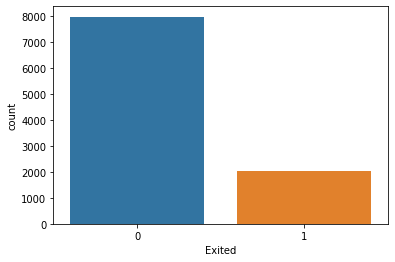

In [ ]:
sns.countplot(churn.Exited)

- En este gráfico podemos visualizar que un 20% de los clientes abandonaron la Institución.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


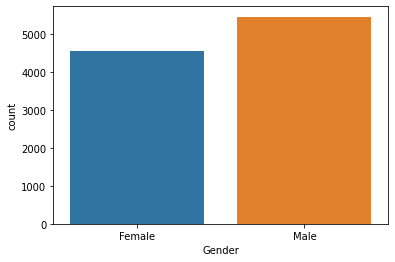

In [ ]:
sns.countplot(churn.Gender)

- En esta visualización observamos que la mayoría de los clientes son hombres.

- Realizamos un Displot


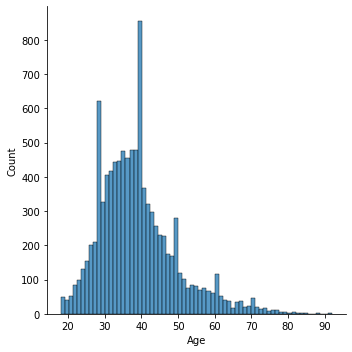

In [ ]:
sns.displot(churn.Age)

- En este gráfico vemos que la mayoría de los clientes del Banco tienen 40 y 29 años.

- Realizamos un countplot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


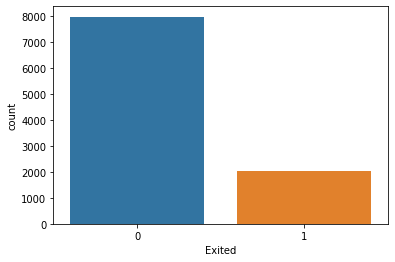

In [ ]:
sns.countplot(churn.Exited)

- Visualizamos que hay mas 0 que 1, eso quiere decir que son más las personas que permanecen siendo Clientes del Banco, que las que se fueron de la Institución.

# Análisis Bivariado

- Realizamos Histograma

In [ ]:
fig = px.histogram(churn, x="Exited", color="Gender", barmode="group", title='Churn según el Género')
fig.update_layout(width=800, height=600, bargap=0.1)
fig.show()

- En esta visualización podemos ver que fueron más las mujeres las que dejaron de ser clientas del Banco.
- Por otro lado vemos que hay más clientes hombres que clientas mujeres.

In [ ]:
fig = px.histogram(churn, x="Exited", color="Geography", barmode="group", title='Churn según el país')
fig.update_layout(width=800, height=600, bargap=0.1)
fig.show()

- Podemos visualizar en el gráfico que Francia es el que más Clientes tiene en el Banco, luego le sigue España y por último Alemania.
- También vemos que Francia y Alemania son los países que mayor churn tuvieron y España el que menos tuvo.
- Además notamos que hay más 0 (personas que NO se fueron del Banco) que 1 (Personas que SI se fueron del Banco).

In [ ]:
fig = px.histogram(churn, x='Age', color='Exited', barmode='group', title='Churn según Edad' )
fig.update_layout(width=800, height = 600)
fig.show()

- En esta visualización podemos ver que la mayor cantidad de Churn lo hicieron las personas de entre 35 y 57 años de edad.
- Mientras que las personas que permanecen siendo Clientas del Banco son las de entre 29 y 41 años.

In [ ]:
fig = px.histogram(churn, x='NumOfProducts', color='Exited', barmode='group', title='Churn según los productos obtenidos a través del Banco' )
fig.update_layout(width=800, height = 600)
fig.show()

- En esta visualización podemos observar que los que más se fueron del Banco son los que obtuvieron 1 sólo producto, también podemos notar que decrece la cantidad desde 1 a 4 productos obtenidos.
- Además, vemos que los que siguen siendo clientes del Banco tienen en su mayoría 1 y 2 productos.

- Realizamos Bar

In [ ]:
fig = px.bar(churn, x='IsActiveMember', y='Exited')
fig.update_layout(
    height = 500,
    width = 900,
    title_text = 'Personas que hicieron Churn',
    xaxis_title ='Inactivo / Activo',
    plot_bgcolor='white'
) 

- Este gráfico nos muestra que los clientes inactivos son los que más se van del banco, mientras que los clientes activos si bien se van, es en menor medida.

In [ ]:
fig = px.bar(churn, x='Tenure', y='Exited')
fig.update_layout(
    height = 500,
    width = 900,
    title_text = 'Personas que hicieron Churn según antigüedad',
    xaxis_title ='Años de antigüedad',
    plot_bgcolor='white'
) 

- En este gráfico podemos visualizar que los clientes que más se fueron del Banco son los de 1 año de antigüedad.
- También vemos que los que menos abandonaron el Banco son los que tienen 0 y 10 años de antigüedad.

Creamos Mapa de Correlaciones

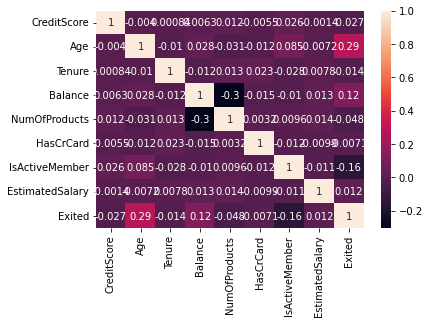

In [ ]:
sns.heatmap(churn.corr(), annot=True);

# Como conclusión obtuvimos lo siguiente:
- El género femenino es el que más abondonó el Banco, igualmente no vemos una diferencia significativa con el género masculino.
- La mayor cantidad de Churn lo hicieron las personas de entre 35 y 57 años de edad, mientras que las personas que permanecen siendo Clientas del Banco son las de entre 29 y 41 años.
- Las personas de Francia y Alemania son las que más se fueron del Banco.
- Los Clientes que más se fueron del Banco son los que obtuvieron 1 sólo producto, también podemos notar que decrece la cantidad desde 1 a 4 productos obtenidos. Por ende, cuantos más productos adquiridos tenga el Cliente, más probable es que abandone el Banco.
- Los clientes inactivos son los que más se fueron del banco.
- Los clientes que más se fueron del Banco son los de 1 año de antigüedad, mientras que los que menos abandonaron el Banco son los que tienen 0 y 10 años de antigüedad.